<a href="https://colab.research.google.com/github/nebojsa-bozanic/OSuM/blob/master/OSuM_Vezba4/OSuM_Vezba4/OSuM_vezba_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Obrada slike u medicini (BMI)</h1>

Literatura: https://moodle.telekom.ftn.uns.ac.rs/course/view.php?id=82


Laboratorijska vežba 4:

Multiveličinska analiza: Vejvlet piramida

Potrebne biblioteke: cv2, numpy, matplotlib.pyplot, pywt (PyWavelets), dtcwt

In [1]:
!git clone https://github.com/nebojsa-bozanic/OSuM.git
%cd /content/OSuM/OSuM_Vezba4/OSuM_Vezba4

Cloning into 'OSuM'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 106 (delta 32), reused 54 (delta 6), pack-reused 0
Receiving objects: 100% (106/106), 28.86 MiB | 19.77 MiB/s, done.
Resolving deltas: 100% (32/32), done.
/content/OSuM/OSuM_Vezba4/OSuM_Vezba4


In [2]:
import pywt
import matplotlib.pyplot as plt
import cv2

1. Diskretna vejvlet transformacija

1.1 (Napraviti skriptu dwt.py i u njoj) učitati sliku mr_glava_1.jpg.

In [3]:
im = cv2.imread('mr_glava_1.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('knee.tif', cv2.IMREAD_GRAYSCALE)  #1.7

1.2 Primeniti 2D diskretnu vejvlet transformaciju kojom se dobija vejvlet piramida sa jednim nivoom. Koristiti db1 vejvlet. Izvući koeficijente u piramide u zasebne slike. Šta koja slika predstavlja?

In [4]:
w = 'db1'
coeffs = pywt.dwt2(im, w, mode='periodization')
cA, (cH, cV, cD) = coeffs


1.3 Prikazati piramidu koristeću subplot funkciju. Položaj koeficijenata je prikazan na slici ispod:
cA cH
cV cD


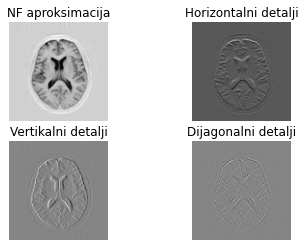

In [5]:
plt.figure()
plt.subplot(2,2,1)
plt.imshow(cA, cmap='gray')
plt.title('NF aproksimacija')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(cH, cmap='gray')
plt.title('Horizontalni detalji')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(cV, cmap='gray')
plt.title('Vertikalni detalji')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(cD, cmap='gray')
plt.title('Dijagonalni detalji')
plt.axis('off')
plt.show()

1.4 Rekonstruisati piramidu. Prikazati rekonstruisanu sliku i odrediti sumu apsolutnih razlika između originalne i rekonstruisane slike. Da li rekonstrukciju možemo smatrati idealnom?



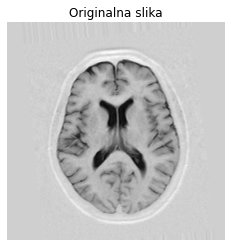

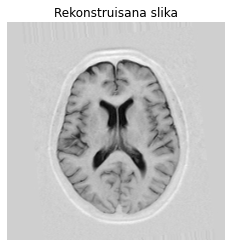

Suma apsolutnih razlika između originalne i rekonstruisane slike: 0


In [6]:
im_r = pywt.idwt2(coeffs,w,mode='periodization')

plt.figure()
plt.imshow(im, cmap='gray')
plt.title('Originalna slika')
plt.axis('off')

plt.figure()
plt.imshow(im_r, cmap='gray')
plt.title('Rekonstruisana slika')
plt.axis('off')
plt.show()

r = sum(sum(abs(im-im_r)))
print('Suma apsolutnih razlika između originalne i rekonstruisane slike:', round(r))

1.5 Od iste ulazne slike napraviti vejvlet piramidu sa 3 nivoa. Koristiti db1 vejvlet. Pre formiranja slike piramide zameniti položaj cV i cH koeficijenata na svakom nivou, kako bi piramida bila organizovana na način prikazan iznad. Za potrebe prikaza normalizovati opseg (rekonstrukciju raditi sa nenormalizovanim koeficijentima). Analizirati šta se vidi na višim, a šta na nižim rezolucijama u sva tri pravca.


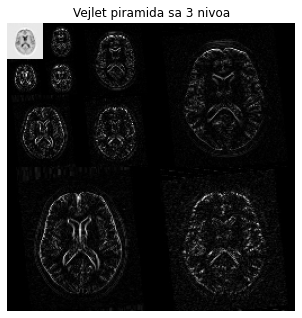

In [7]:
w = 'db1'
n = 3
C = pywt.wavedec2(im, wavelet=w, mode='periodization', level=n)

C[0] = C[0]/abs(C[0]).max()
C[1] = [d/abs(d).max() for d in C[1]]
C[2] = [d/abs(d).max() for d in C[2]]
C[3] = [d/abs(d).max() for d in C[3]]

cA3 = C[0]
(cH3, cV3, cD3) = C[1]
(cH2, cV2, cD2) = C[2]
(cH1, cV1, cD1) = C[3]

C[1][0] = cV3
C[1][1] = cH3
C[2][0] = cV2
C[2][1] = cH2
C[3][0] = cV1
C[3][1] = cH1

coeff_array, coeff_slices = pywt.coeffs_to_array(C)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(abs(coeff_array), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('Vejlet piramida sa 3 nivoa')
plt.show()

1.6 Promeniti tip vejvleta (db2, db3, db5, haar…) i dubinu razlaganja. Koje efekte primećujete? Kako izgleda piramida dobijena db1, a kako db5 vejvletom?


1.7 Ponoviti korake iz 1.5 i 1.6 na slici knee.tif.

# 2. Kompresija

2.1 U skriptu kompresija.py učitati sliku 1_MR.jpg i od nje napraviti vejvlet piramidu od 4 nivoa koristeći db1 vejvlet.

In [8]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import cv2

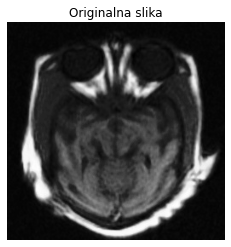

In [9]:
im = cv2.imread('1_MR.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('knee.tif', cv2.IMREAD_GRAYSCALE) #2.5

plt.figure()
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Originalna slika')

w = 'db1'
n = 4
C = pywt.wavedec2(im, wavelet=w, mode='periodization', level=n)
coeff_array, coeff_slices = pywt.coeffs_to_array(C)


2.2 Pronaći prag intenziteta ispod koga se nalazi 90 % koeficijenata vejvlet piramide i svasti na 0 one čija je apsolutna vrednost manja od t (zadržati 10 % koeficijenata).

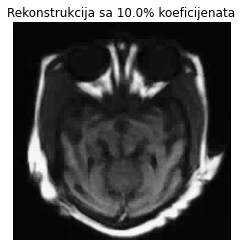

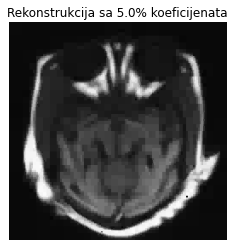

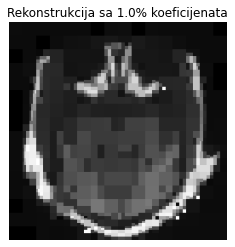

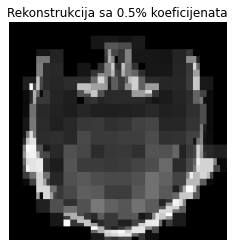

In [10]:
Csort = np.sort(abs(coeff_array.reshape(-1)))  #sortiranje u rastucem poretku

for x in [0.1, 0.05, 0.01, 0.005]:  # x - koliko se koeficijenata zadrzava

    # t - vrednost na poziciji poslednjek koeficijenta koji se odbacuje
    t = Csort[int(np.floor((1-x)*len(Csort)))]
    # maska sa 0 i 1; 1 - koeficijent je veci od definisanog praga
    m = abs(coeff_array)>t
    coeff_filt = coeff_array*m

    #2.3
    Cfilt = pywt.array_to_coeffs(coeff_filt, coeff_slices, output_format='wavedec2')
    im_r = pywt.waverec2(Cfilt, wavelet=w, mode='periodization')

    plt.figure()
    plt.imshow(np.uint8(im_r), cmap='gray')
    plt.axis('off')
    plt.title('Rekonstrukcija sa '+str(x*100)+'% koeficijenata')

plt.show()

2.3 Rekonstruisati sliku sa preostalih 10 % koeficijenata i uporediti je sa originalnom.

2.4 Prethodne korake ponoviti tako da se zadrži 5, 1 i 0.5 % koeficijenata.

2.5 Ponoviti prethodna 4 koraka za sliku knee.tif.

# 3. Dual Tree kompleksna vejvlet transformacija

3.1 Napraviti skriptu dt_kompl_vejvlet.py i od slike 1_MR.jpg napraviti Dual Tree kompleksnu vejvlet piramidu od 2 nivoa.

In [11]:
!pip install dtcwt

     |████████████████████████████████| 70 kB 5.7 MB/s 
  Created wheel for dtcwt: filename=dtcwt-0.12.0-py3-none-any.whl size=87884 sha256=ef603b011e78ef14a260587e2981242e6a94d8d506e1eadc934a6b20d3a0953e
  Stored in directory: /root/.cache/pip/wheels/36/17/44/41d78d570172185f944f9b79f983905ab9072d70dbdb118710
Successfully built dtcwt


In [12]:
import dtcwt
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
im = cv2.imread('1_MR.jpg', cv2.IMREAD_GRAYSCALE)

n = 2
transform = dtcwt.Transform2d()
C = transform.forward(im, nlevels=n)

3.2 Prikazati moduo i argument za sve orijentacije i za sve rezolucije. Na kojim slikama se može uočiti orijentacija detalja?

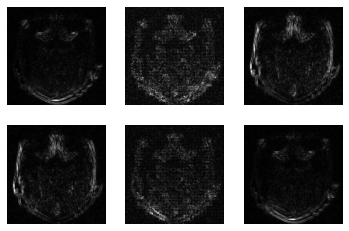

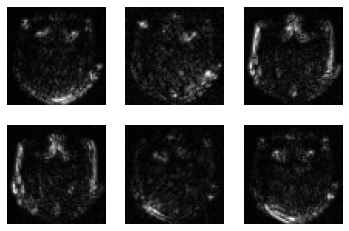

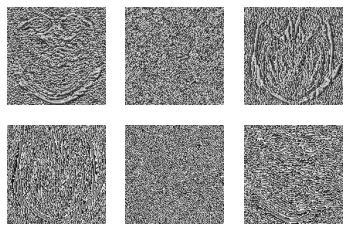

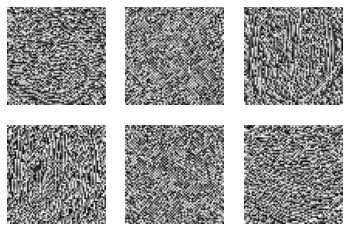

In [14]:
for l in range(0, n):
    fig = plt.figure()
    fig.canvas.set_window_title(('Moduo koeficijenata na nivou '+str(l)))
    for slice in range(C.highpasses[l].shape[2]):
        plt.subplot(2, 3, slice+1)
        sl = abs(C.highpasses[l][:,:,slice])
        plt.imshow(sl, cmap='gray', vmin=sl.min(), vmax=sl.max())
        plt.axis('off')

# plt.show()


for l in range(0, n):
    fig = plt.figure()
    fig.canvas.set_window_title(('Argument koeficijenata na nivou '+str(l)))
    for slice in range(C.highpasses[l].shape[2]):
        plt.subplot(2, 3, slice+1)
        sl = np.angle(C.highpasses[l][:,:,slice])
        plt.imshow(sl, cmap='gray', vmin=-np.pi, vmax=np.pi)
        plt.axis('off')

plt.show()